In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset (replace with your actual data file)
data = pd.read_csv("/content/IRIS (1).csv")

In [ ]:
# Select features for clustering (numerical features)
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = data[features]

In [ ]:
# Scale the features (important for K-means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Test different values of K
k_values = range(2, 11)  # Test K from 2 to 10
inertia_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

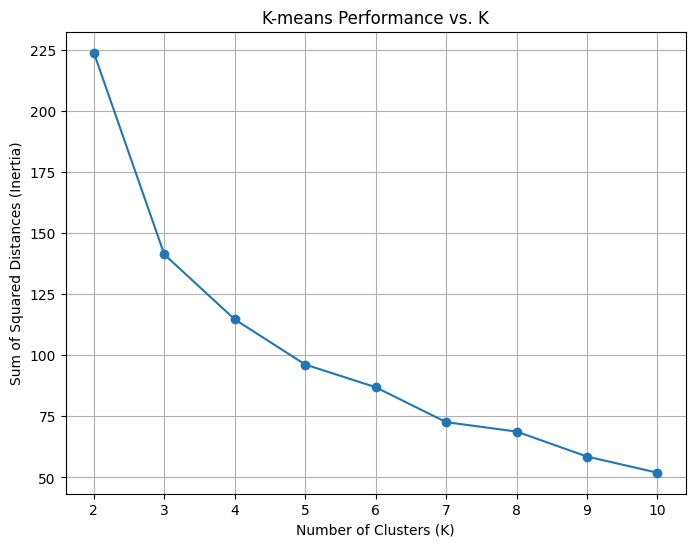

In [ ]:
# Evaluate performance (sum of squared distances to centroids)
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.title('K-means Performance vs. K')
plt.grid(True)
plt.show()

In [ ]:
# Example with a chosen K (e.g., K=3)
k = 3  # Choose the best K based on the plot above
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=0)

In [ ]:
# Get cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [ ]:
# Evaluate performance (sum of squared distances)
inertia = kmeans.inertia_
print(f"Inertia (Sum of Squared Distances) for K={k}: {inertia}")

Inertia (Sum of Squared Distances) for K=3: 141.2208872836681


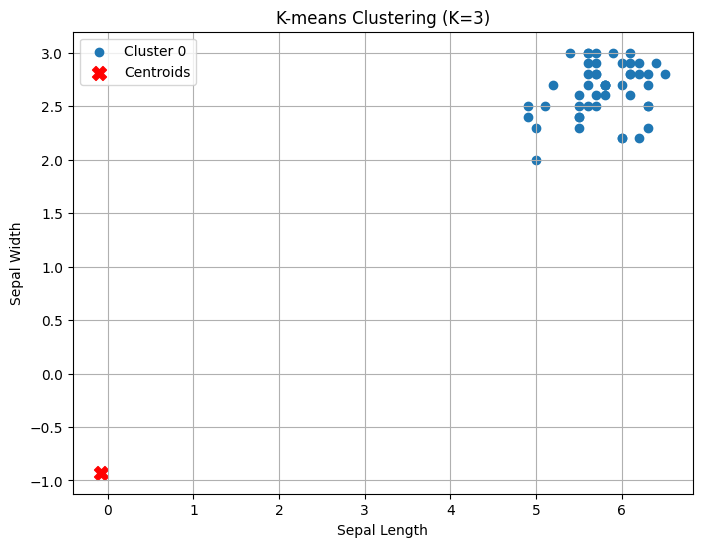

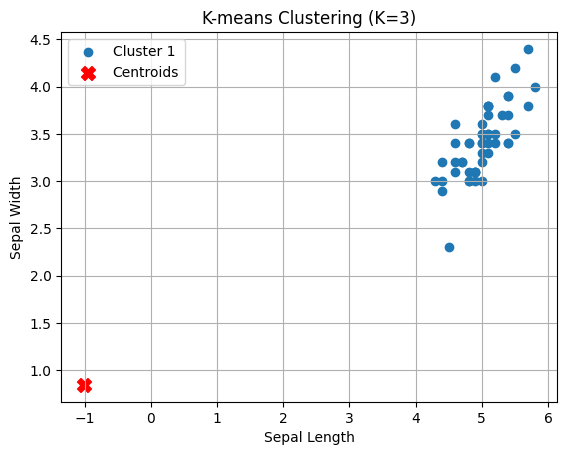

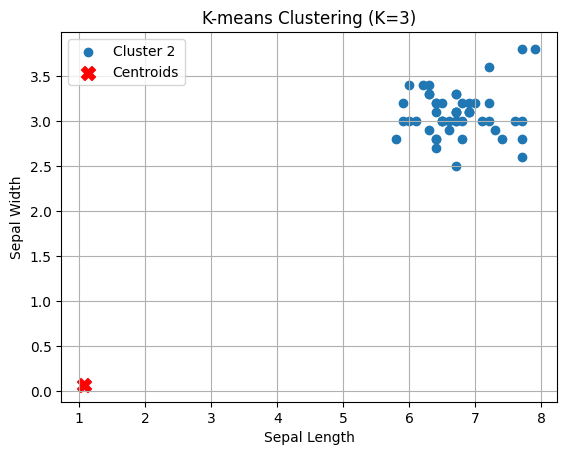

In [ ]:
# Visualize the results (using the first two features for example)
plt.figure(figsize=(8, 6))
# Add the cluster labels to the DataFrame
data['cluster'] = labels  # Assign cluster labels to a new column 'cluster'
for cluster in range(k):
  cluster_data = data[data['cluster'] == cluster]
  plt.scatter(cluster_data['sepal_length'], cluster_data['sepal_width'], label=f'Cluster {cluster}')
  plt.scatter(centroids[cluster, 0], centroids[cluster, 1], s=100, c='red', marker='X', label='Centroids')
  plt.xlabel('Sepal Length')
  plt.ylabel('Sepal Width')
  plt.title('K-means Clustering (K=3)')
  plt.legend()
  plt.grid(True)
  plt.show()